In [1]:
import gwpy
import numpy as np
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import h5py
import torch

In [2]:
sample_rate = 2048
duration = 2
shape = (10, sample_rate * duration)

tensor([  0.1000, 100.0000, 100.0000,  ...,   0.1000,   0.1000,   0.1000])


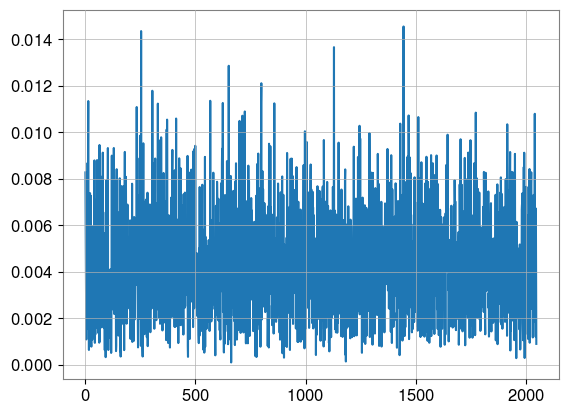

torch.Size([1, 10, 4096]) torch.Size([1, 10, 1])


In [14]:
X = torch.randn(shape)
ndim = X.ndim

# possibly interpolate our PSD to match the number
# of frequency bins we expect to get from X
N = X.size(-1)
num_freqs = N // 2 + 1

# normalize the number of expected dimensions in the PSD
while psd.ndim < 3:
    psd = psd[None]

if psd.size(-1) != num_freqs:
    # TODO: does there need to be any rescaling to
    # keep the integral of the PSD constant?
    psd = torch.nn.functional.interpolate(
        psd, size=(num_freqs), mode="linear"
    )


X_fft = torch.fft.rfft(X, norm="forward", dim=-1)
while X_fft.ndim < 3:
    X_fft = X_fft[None]
X_fft *= psd ** 0.5

plt.plot((X_fft[0][0].abs()))
plt.show()

X_fft = torch.fft.irfft(X_fft, norm="forward", dim=-1)
print(X_fft.shape, torch.std(X_fft, dim=-1, keepdim=True).shape)
X_fft /= torch.std(X_fft, dim=-1, keepdim=True)


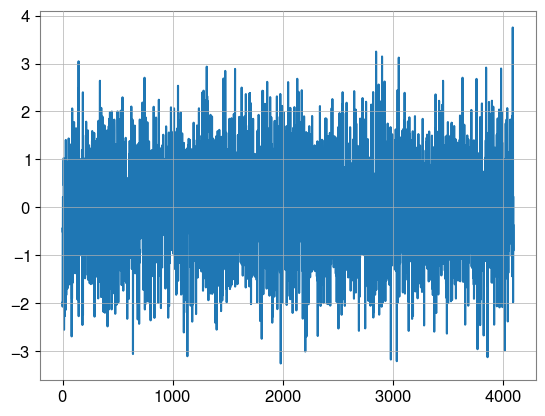

In [9]:
plt.plot(X_fft[0][0])
plt.show()

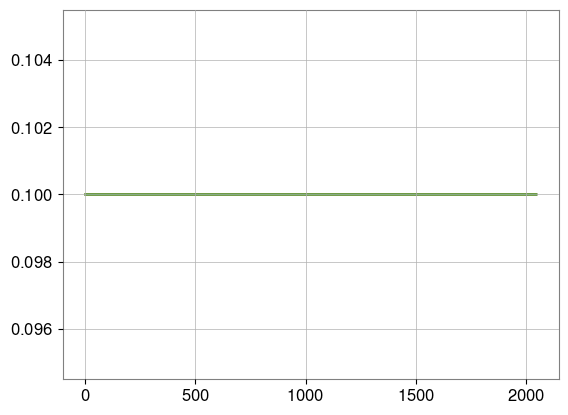

In [13]:
plt.plot(psd[0][0])
plt.show()

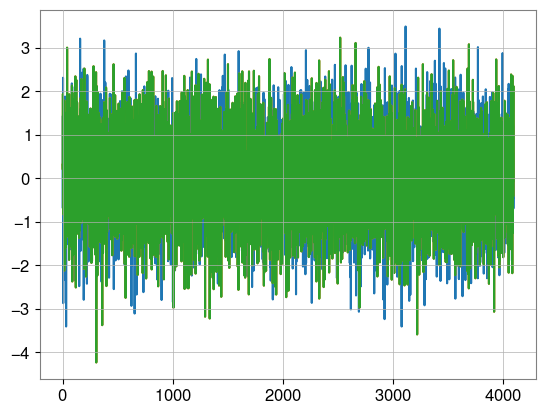

In [8]:
plt.plot(colored.real)
plt.show()

In [13]:
sample_rate = 4096
ts = np.random.normal(size=sample_rate * 100)
ts = TimeSeries(ts.astype(np.float64), dt=1/4096)

In [14]:
# Data files are on LLO
# Signal + noise pre-whiten
with h5py.File("/home/william.benoit/4096/pre_whiten.h5", "r") as f:
    pre_whiten = f["X"][:, :, 2048:-2048]

# Signal + noise post-whiten
with h5py.File("/home/william.benoit/4096/post_whiten.h5", "r") as f:
    post_whiten = f["X"][:]
    y = f["y"][:]

signal_idx = np.squeeze(np.argwhere(np.squeeze(y) == 1))
background = pre_whiten[~signal_idx]
pre_signals = pre_whiten[signal_idx]
post_signals = post_whiten[signal_idx]

In [17]:
print(signal_idx)

[  1   3   4   9  10  13  15  17  19  23  24  26  30  31  33  34
  36  37  38  46  48  50  54  55  58  61  62  63  64  73  75  86
  89  92  95  98 100 102 105 110 111 124 131 132 133 134 135 136
 143 144 145 149 153 159 173 178 179 180 184 191 199 204 210 214
 218]


In [38]:
ts = TimeSeries.fetch_open_data("H1", 1240578783, 1240577783)
ts = ts.resample(1024)
psd = ts.psd(fftlength=2)
plt.loglog(psd.frequencies, psd.value, alpha=0.7)
plt.show()

timeout: The read operation timed out

In [9]:
background = pre_whiten[~signal_idx]
psd = ts.psd(fftlength=2)
ts = TimeSeries(background[0, 0].astype(np.float64), dt=1/4096)
gwpy_spec = ts.whiten(asd=(psd)**0.5).spectrogram(stride=1/32)


In [11]:
ts

<TimeSeries([-3.66459392e-20, -2.74930480e-20, -3.97862843e-20,
             ...,  3.30957020e-20,  4.37185422e-20,
              4.44039141e-20]
            unit=Unit(dimensionless),
            t0=<Quantity 0. s>,
            dt=<Quantity 0.00024414 s>,
            name=None,
            channel=None)>

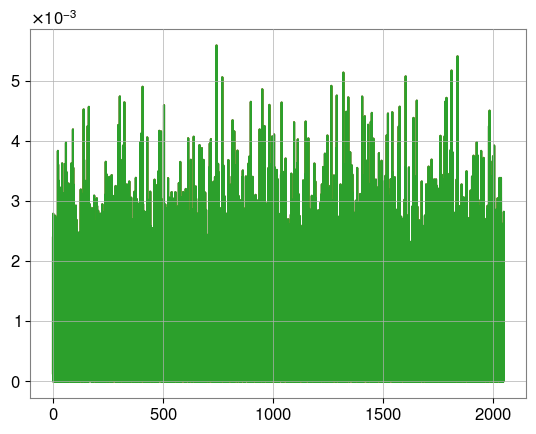

In [14]:
plt.plot(psd)
plt.show()

In [3]:
import logging
logger = logging.getLogger()
print(logger)
logging.basicConfig(level=logging.DEBUG)
print(logger)

<RootLogger root (DEBUG)>
<RootLogger root (DEBUG)>


In [5]:
logging.getLogger("test")
logging.basicConfig.

In [19]:
default_level = logger.getEffectiveLevel()

In [10]:
level_name = logging.getLevelName(default_level)
level_name

'DEBUG'

In [18]:
from ml4gw import spectral

fftlength = 2
overlap = 1
duration = 10
sample_rate = 2048
times = torch.linspace(0, duration, int(sample_rate * duration))
frequencies = [10, 100, 500, 800]
signal = torch.zeros_like(times)
for frequency in frequencies:
    signal += torch.sin(2 * np.pi * frequency * times)

nperseg = int(fftlength * sample_rate)
window = torch.hann_window(nperseg)
nstride = nperseg - int(overlap * sample_rate)
psd = spectral.spectral_density(signal, sample_rate)

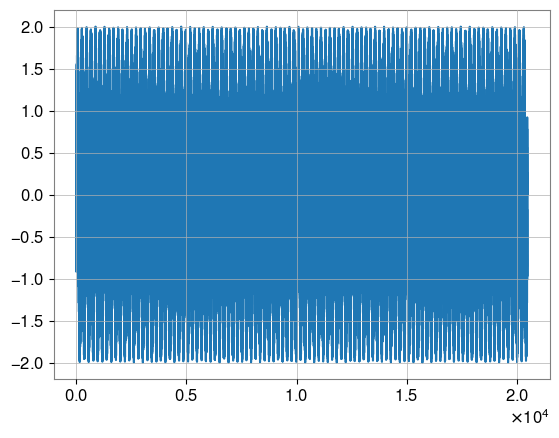